In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore')

In [31]:
df=pd.read_csv("survey lung cancer.csv")    #Reading dataset

In [32]:
df.head()      #Print the first five rows

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,69.0,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,74.0,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,59.0,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,63.0,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,63.0,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [33]:
df.isna().sum()    #To return the number of missing values

AGE                      5
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [34]:
#filling missing values using mean
df['AGE']=df['AGE'].fillna(df['AGE'].mean())

In [35]:
df.isna().sum()

AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

<Axes: >

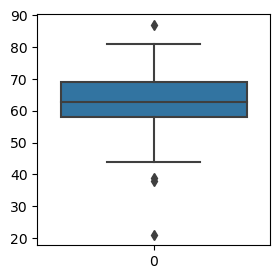

In [36]:
#boxplot help to detect the outliers 
plt.figure(figsize=(3,3))
sbn.boxplot(df['AGE'])  

In [37]:
#use IQR method to handle outliers           
q1 = df['AGE'].quantile(0.25)
q3 = df['AGE'].quantile(0.75)
iqr = q3-q1
q1, q3, iqr

(58.0, 69.0, 11.0)

In [38]:
#calculate upper and lower 
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(41.5, 85.5)

In [39]:
df.loc[(df['AGE'] > upper_limit) | (df['AGE'] < lower_limit)]

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
22,21.0,2,1,1,1,2,2,2,1,1,1,2,1,1,0
238,38.0,1,2,1,1,2,2,2,2,1,2,2,1,2,1
261,39.0,2,1,1,2,1,2,2,2,2,1,2,1,2,1
277,87.0,1,1,1,1,2,2,1,1,1,1,2,1,1,0


In [40]:
df.loc[(df['AGE']>=upper_limit), 'AGE'] = upper_limit
df.loc[(df['AGE']<=lower_limit), 'AGE'] = lower_limit

<Axes: >

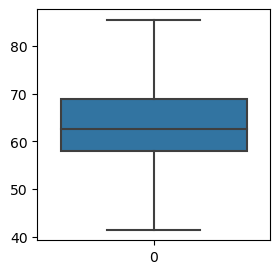

In [41]:
plt.figure(figsize=(3,3))
sbn.boxplot(df['AGE'])  

In [42]:
df.describe()    

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.751959,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,0.870550
std,7.794756,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.336242
min,41.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.671053,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,85.500000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


<Axes: xlabel='AGE', ylabel='Density'>

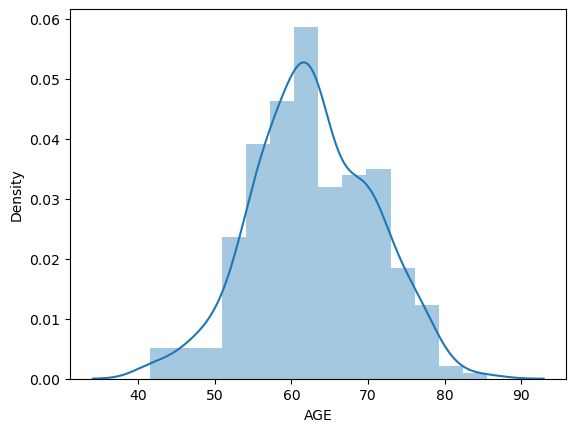

In [43]:
#distribution plot to represnt distrbution of data 
sns.distplot(df['AGE'])    

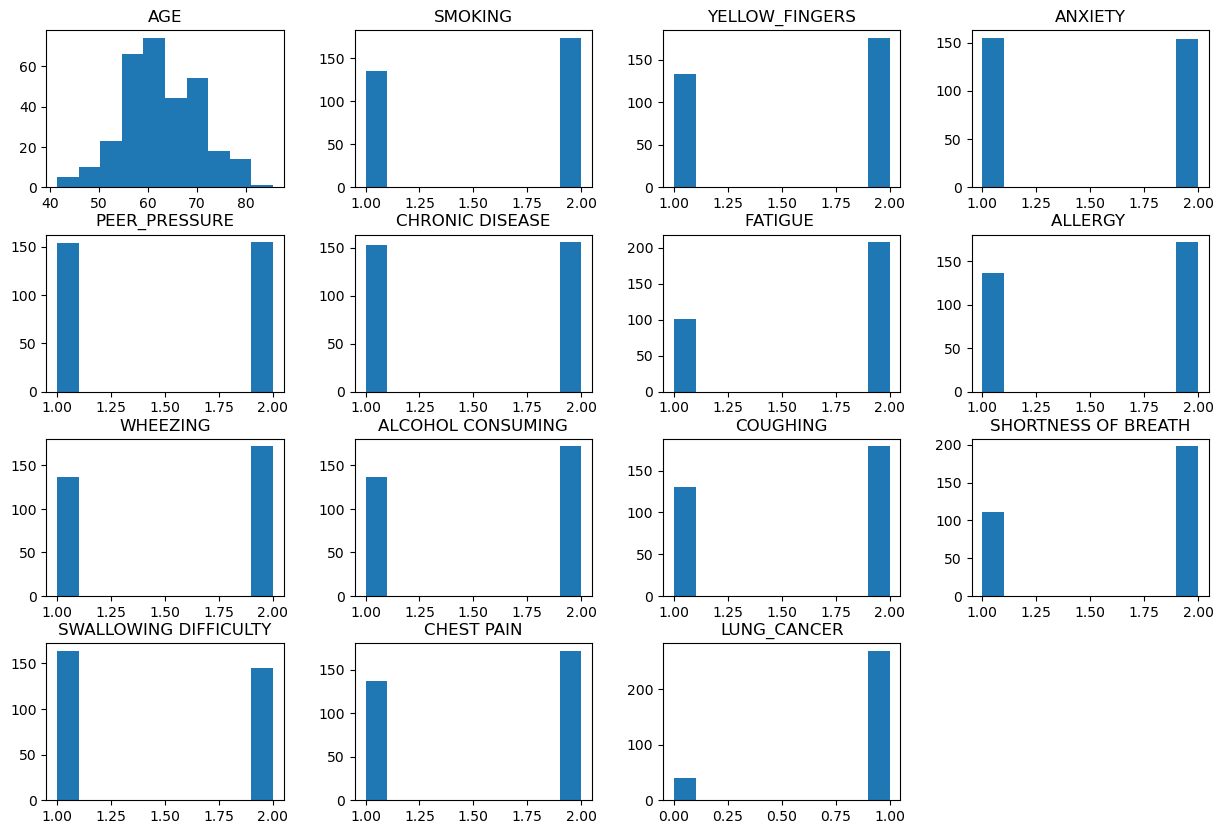

In [44]:
hist_worst=df.hist(bins=10, figsize=(15, 10),grid=False,)